# Wine Quality Classification

In this assignment, we will use logistic regression to judge the quality of wines. The dataset is taken from UCI machine learning repository. For description of the dataset, see [here](https://archive.ics.uci.edu/ml/datasets/wine+quality).

Attributes of the dataset are listed as following:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Output variable (based on sensory data): 
12. quality (score between 0 and 10)

##### In the first part, we call the sklearn library for logistic regression. We have filled out most of the code for this part. In the second part, you will design your own Logistic Regression from scratch, Yayy! This will mean implementing the various building blocks we learnt in class. Also, keep in mind that this part will serve as a stepping stone later when we design our own neural network.


The following code loads the dataset, and the dataset looks like the following:

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
#train = np.genfromtxt('wine_training1.txt', delimiter=',')
red = pd.read_csv('winequality-red.csv')
white = pd.read_csv('winequality-white.csv')
red = shuffle(red, random_state = 10)
white = shuffle(white, random_state = 10)
red.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1518,7.4,0.470,0.46,2.2,0.114,7.0,20.0,0.99647,3.32,0.63,10.5,5
1246,7.4,0.740,0.07,1.7,0.086,15.0,48.0,0.99502,3.12,0.48,10.0,5
544,14.3,0.310,0.74,1.8,0.075,6.0,15.0,1.00080,2.86,0.79,8.4,6
1343,7.5,0.510,0.02,1.7,0.084,13.0,31.0,0.99538,3.36,0.54,10.5,6
428,9.1,0.520,0.33,1.3,0.070,9.0,30.0,0.99780,3.24,0.60,9.3,5
1190,9.1,0.400,0.57,4.6,0.080,6.0,20.0,0.99652,3.28,0.57,12.5,6
1056,8.9,0.480,0.53,4.0,0.101,3.0,10.0,0.99586,3.21,0.59,12.1,7
361,8.6,0.450,0.31,2.6,0.086,21.0,50.0,0.99820,3.37,0.91,9.9,6
367,10.4,0.575,0.61,2.6,0.076,11.0,24.0,1.00000,3.16,0.69,9.0,5
1401,7.9,0.690,0.21,2.1,0.080,33.0,141.0,0.99620,3.25,0.51,9.9,5


## Data Splitting
To convert this into a binary classification task, we split the quality into a binary feature *good* or *bad* depending on whether the quality is larger than 6 or not.

Next for both red and white wines, we randomly pick $70\%$ of the data to be our training set and the remaining for testing .

In [5]:
from sklearn.model_selection import train_test_split
X_red = red.iloc[:, :-1]
y_red = red.iloc[:, -1] >= 6

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_red, y_red, test_size=0.3, random_state = 0)

X_white = white.iloc[:, :-1]
y_white = white.iloc[:, -1] >= 6
X_train_white, X_test_white, y_train_white, y_test_white = train_test_split(X_white, y_white, test_size=0.3, random_state = 0)

#y_red.head(10)
y_white.head(10)

4731     True
937     False
1217    False
3296    False
4524     True
3640     True
785      True
393      True
562      True
1285     True
Name: quality, dtype: bool

In [8]:
X_train_white.shape
#y_train_white.shape

(3428, 11)

## Problem 1 Logistic Regression for Red Wine and White Wine

The code below trains Logistic Regression classifiers for red wine and white wine separately and tests them on the corresponding dataset. 

In [9]:
# Trained and tested on red wine
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import hamming_loss
clf_red = LogisticRegression(solver = 'sag', max_iter=10000)
clf_red.fit(X_train_red, y_train_red)
y_pred_red = clf_red.predict(X_test_red)
error_red = hamming_loss(y_test_red, y_pred_red)
print('The testing error for red wine is: ' + str(error_red) + '.')

The testing error for red wine is: 0.275.


In [107]:
# Trained and tested on white wine
clf_white = LogisticRegression(solver = 'sag', max_iter=10000)
clf_white.fit(X_train_white, y_train_white)
y_pred_white = clf_white.predict(X_test_white)
error_white = hamming_loss(y_test_white, y_pred_white)
print('The testing error for white wine is: ' + str(error_white) + '.')

The testing error for white wine is: 0.2612244897959184.


### 1.1
What happens if you apply them to different domains? Test the model trained using 'X_trn_white, y_trn_white' on 'X_test_red', and vice versa. Print out the errors and compare with previous results.

In [108]:
#===== Your code here ======
y_pred_red = clf_white.predict(X_test_red)
error_red = hamming_loss(y_test_red, y_pred_red)

y_pred_white = clf_red.predict(X_test_white)
error_white = hamming_loss(y_test_white, y_pred_white)

print('The testing error for red wine when using white wine training data model is: ' + str(error_red) + '.')
print('The testing error for white wine when using red wine training data model is: ' + str(error_white) + '.')
#===== Your code here ======

The testing error for red wine when using white wine training data model is: 0.35625.
The testing error for white wine when using red wine training data model is: 0.3401360544217687.


 ### 1.2 Do the test errors increase or decrease? Explain why this happens.
 ### This is because the logistic regression classifier that is used to classify the testing data of each type of wine did not come from the training result of the same type of wine. When a logistic regression classifier is being trained with a set of training data, the goal is to mold the classifier to be able to classify or predict the labels for a similar type of data. So for example, when the logistic regression is being trained with the data of red wine, then the classifier is meant to classify or predict the labels of other red wine, given the values of the features. In this case, when the data that is given to predict is of white wine, then the logistic regression will not be able to classify well, since red and white wine will have different tendencies/behavior throughout the features. Thus, when you apply test data to different domains, the error will increase.

# Problem 2 The effect of regularization
In this section we will investigate the effect of regularization. The code below runs logistic regression in sklearn, using $\ell_2$ regularization with regularizer value $\lambda$ in the set $\{0.00001 \times 4^i: i = 0,1,2,..., 15\}$. (The regularization parameter 'C' in scikit-learn is the inverse of $\lambda$ we see in class). Training and test errors are plotted with respect to the regularizer value $\lambda$. 

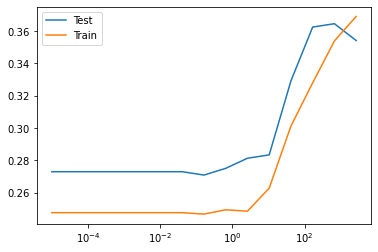

In [109]:
N = np.array(range(0,15))
lamb = 0.00001*(4**N)
error_trn = np.zeros(15)
error_tst = np.zeros(15)
for i in N:
    c = lamb[i]
    clf = LogisticRegression( C = 1/c, solver = 'sag', max_iter= 10000)
    clf.fit(X_train_red, y_train_red)
    y_pred = clf.predict(X_test_red)
    error_tst[i] = hamming_loss(y_test_red, y_pred)
    y_pred_trn = clf.predict(X_train_red)
    error_trn[i] = hamming_loss(y_train_red, y_pred_trn)
plt.figure(1)
plt.semilogx(lamb, error_tst, label = 'Test')
plt.semilogx(lamb, error_trn, label = 'Train')
plt.legend()

### Explain the effect of regularization on training and test errors. Are they effected differently?
### Yes, the effect of regularization on training and testing errors are different. Regularization is being used to prevent overfitting. In regularization, we are setting the parameter lambda to determine the penalty to regularize. When lambda is small (for example: lambda = 10^-5), we will have overfitting. Then, as we increase lambda to be bigger (lambda = 10^-1), we can see that overfitting is reduced and we are getting a more accurate prediction for our testing. However, the training error is not effected as they cannot decrease anymore (the slight dip on the plot is just noise and is negligible). This is how regularization effects differently, where testing prediction will improve but no improvement in training prediction. Then, as the lambda keeps on getting bigger (lambda = 10),it keeps on reducing complexity and the model became too simple, so training and testing error will just increase.

# Problem 3 Implementing Logistic Regression from Scratch
In this section, we will implement a logistic regression classifier from scratch and train it using gradient descent. You are **NOT** allowed to use any pre-built logistic regression classifiers or gradient solvers from any machine learning libraries. 

Before we start implementing, it helps to know that when working with data in high dimensional space, **vectorization** is a technique that may significantly help decrease the running time of your code. Simply put, compared to using for-loops, it is usually preferred to directly work with matrices and vectors as a whole and compute expressions using built-in matrix/vector operations when no significant overhead in computation is introduced. 

Here is a simple example. Suppose we have two vectors $a\in\mathbb{R}^n$ and $x\in\mathbb{R}^n$, and we want to compute the following expression:
$$
c=\sum_{i=1}^na_ix_i
$$
One could naively implement this using a for loop. However, note that $c=a\cdot x$. If we use the dot product/matrix multiplication function in numpy, the running time can be significantly reduced, as you will observe in the following code.

In [110]:
import time
N = 1000000
a = np.random.normal(0, 1, N)
x = np.random.normal(0, 1, N)

# Vectorized code
start_time = time.time()
c = np.dot(a, x)
print("Vectorized: %s seconds" % (time.time() - start_time))

# Dummy code
start_time = time.time()
c = 0
for i in range(N):
    c += a[i]*x[i]
print("For loop: %s seconds" % (time.time() - start_time))

Vectorized: 0.00090789794921875 seconds
For loop: 0.6784160137176514 seconds


For this reason when we work with a dataset, it is preferred to process it as an entire batch (or several batches) using vectorization.
Throughout this this problem, we define the following expressions:

$n$ - the dataset size 

$d$ - feature dimension.

$X\in\mathbb{R}^{n\times d}$ - the dataset written in an $n\times d$ matrix where the $i$-th row is the feature vector $x_i\in\mathbb{R}^d$ of data $i$.

$Y\in\{0, 1\}^n$ - the labels of all data.

$\theta\in \mathbb{R}^d$ - the parameters of the logistic regression model to be learned.

First we will implement the sigmoid function. The input $z$ is an $n$-d vector, and the output $y$ is also an $n$-d vector such that each coordnate $y_i=Sigmoid(z_i)$.

In [125]:
def sigmoid(z):
    # z and y: n-dimensional vector
    n = z.shape
    y = np.zeros(n)
    
    #==== Your code here =====
    
    y = 1 / (1 + np.exp(-z)) # or exp(z) / 1  + exp(z)
    
    #==== Your code here =====
    
    return y
    

Then we will implement the logistic regression model. Recall that for each sample $x_i\in\mathbb{R}^d$, logistic regression outputs a "probability estimate":
$$
y_i = Sigmoid(\theta \cdot x_i)\in(0, 1)
$$

Given a parameter $\theta$ and a dataset $X$, your code should output $y\in\mathbb{R}^d$ which contains the probability estimates for the entire dataset.

In [126]:
def LR_forward(X, Theta):
    # This function computes the predicted probability p(y|X,Theta) given X and Theta.
    # X: n*d
    # Theta: d-dimensional vector
    # y: n-dimensional vector
    n = X.shape[0]
    y = np.zeros(n)
    #==== Your code here =====
    
    # Calculate the probability estimate
    y = sigmoid(np.dot(X, Theta)) # input z will be n dimension vector
    
    #==== Your code here =====  

    return y

Then we should compute the gradients. In class we formulated logistic regression as an ML estimator which maximizes the likelihood under some probabilistic assumptions. In practice, it is conventional to implement it as a minimization problem instead. In fact, logistic regression can be equivalently formulated as minimizing the "cross entropy" loss:
$$
CE(Y_i, y_i)= -Y_i\log(y_i) - (1-Y_i)\log(1-y_i),
$$
where $Y_i\in\{0, 1\}$ is the true label and $y_i\in(0, 1)$ is the predicted probability.

Recall that $y_i=Sigmoid(\theta \cdot x_i)$ is a function of $\theta$. The optimization objective is to minimize over $\theta\in\mathbb{R}^d$:
$$
L(X, Y; \theta)=\frac{1}{n}\sum_{i=1}^nCE(Y_i, y_i).
$$

Note that we divided the sum of cross entropy losses by $n$. Without averaging, the optimization problem does not change. However, averaging would ensure that the maginitude of gradients is scalable for datasets of different sizes, and hence is preferred. 

Now in the $LR\_backward$ function, compute the gradient of $L$ with respect to $\theta$.

In [127]:
def LR_backward(Theta, X, Y, y):
    # Y: true label
    # y: predicted probability
    # grads: gradient of the loss function, d*1
    n = X.shape[0]
    d = Theta.shape[0]
    grad = np.zeros(d)
    #==== Your code here =====
    
    # Derive based on likelihood function derived on class
    # Cross entropy loss = 1 - likelihood
    derivative = y - Y
    grad = np.dot(derivative, X) / n
    #==== Your code here =====
    return grad

Now we implement gradient descent. To minimize the loss function $L$, we adjust the parameter $\theta$ by moving a tiny step towards the direction of $-\nabla_{\theta} L$:
$$
\theta\leftarrow \theta-\eta\nabla_{\theta} L
$$
where $\eta>0$ is the learning rate. Now complete this (presumably) one-line code for gradient descent.

In [128]:
def update_parameters(Theta, grads, learning_rate):
    
    #===== Your code here ======
    
    Theta = Theta - learning_rate * grads
    
    #===== Your code here
    
    return Theta

You are almost complete! Now let's test it on the red wine dataset. Before running your code, complete the part in which you implement a complete cycle of parameter update: 

First pass the dataset and parameters through your model to obtain a prediction.

Then, compute gradient with respect to parameters. 

Finally update the parameters using gradient descent.

When you test (or simply play around with) your code , you may change max_iter, initialition, and learning rate. However, the hyper-parameters we provide should work if you follow closely with the previous steps. If everything works out correctly, your test error should be close to that obtained by the built-in classifier in sklearn.

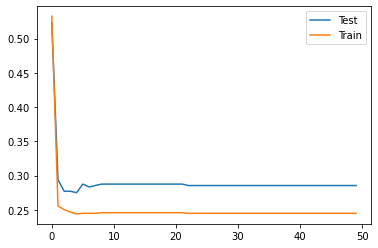

In [131]:
from sklearn import preprocessing
# Preprocessing: scaling and shifting the training data so that all dimensions have mean 0 and std 1
scaler = preprocessing.StandardScaler().fit(X_train_red)
X_train_scaled = scaler.transform(X_train_red)
X_test_scaled = scaler.transform(X_test_red) # Apply the same transformation to test data
n_train = X_train_scaled.shape[0]
n_test = X_test_scaled.shape[0]

# Introduce the bias term by appending features with 1
X_train_scaled = np.concatenate((X_train_scaled, np.ones((n_train, 1) )), axis=1)
X_test_scaled = np.concatenate((X_test_scaled, np.ones((n_test, 1) )), axis=1)

# Start training
(n, d) = X_train_scaled.shape
from sklearn.metrics import accuracy_score
max_iter = 5000
Theta = np.random.normal(0, 0.5, d) # initialization of parameters
learning_rate = 0.1

err_trn = np.zeros(max_iter//100)
err_tst = np.zeros(max_iter//100)

for i in range(max_iter):
    
    #===== Your code here =======
    # Parameter updates
    pred_prob = LR_forward(X_train_scaled, Theta)
    grad = LR_backward(Theta, X_train_scaled, y_train_red, pred_prob)
    Theta = update_parameters(Theta, grad, learning_rate)
    #===== Your code here =======
    
    if i%100==0:
    
        pred_tst = LR_forward(X_test_scaled, Theta) > 0.5
        pred_trn = LR_forward(X_train_scaled, Theta) > 0.5

        cost_tst = accuracy_score(pred_tst, y_test_red)
        cost_trn = accuracy_score(pred_trn, y_train_red)
    
        err_tst[i//100] = 1 - cost_tst
        err_trn[i//100] = 1 - cost_trn
    
plt.figure(2)
plt.plot(err_tst,label = 'Test')
plt.plot(err_trn, label = 'Train')
plt.legend()

The testing error using the model that I derive from scratch (below 0.3) is close to the result obtained using built-in classifier with sklearn (0.275).